<center>
    
# Uber Supply Demand Gap
</center>

---

## Business Understanding

You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. 

## Business Objectives

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of this analysis, able to present the root cause(s) and possible hypotheses of the problem(s) and ways to improve them.  

---

## Required Packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
%matplotlib inline
#plt.rcParams['figure.figsize'] = [25, 10]

---

## Dataset

- We have "Uber Request Data" as our dataset for analysis.
- There are six attributes associated with each request made by a customer:<br/>
    1) **Request id:** A unique identifier of the request<br/>
    2) **Time of request:** The date and time at which the customer made the trip request<br/>
    3) **Drop-off time:** The drop-off date and time, in case the trip was completed <br/>
    4) **Pick-up point:** The point from which the request was made<br/>
    5) **Driver id:** The unique identification number of the driver<br/>
    6) **Status of the request:** The final status of the trip, that can be either completed, cancelled by the driver or no cars available

In [4]:
# Import Dataset
rideReq = pd.read_csv("Uber Request Data.csv")

---

## Data Exploration 

In [5]:
# Shape of the dataset
rideReq.shape

(6745, 6)

In [6]:
# Top rows of the dataset
rideReq.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
# Bottom rows of the dataset
rideReq.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [8]:
# Datatype of all the columns
rideReq.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

From above exploration we can observe few things which can lead our exploration further:<br/>
    1) There are `NA` values in this dataset.<br/>
    2) `Driver id` is a float and we might not even need this variable.<br/>
    3) `Request timestamp` and `Drop timestamp` are not in uniform format.<br/><br/><br/>

In [9]:
# NA values in each column
rideReq.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

From the above count of NA values in each column we can say that in a row `NA` value occurs when:<br/>
        1) There is no cab available for booking. (Both `Driver id` and `Drop timestamp` would be `NA`)<br/>
        2) Driver/Customer cancels the ride. (`Drop timestamp` would be `NA`)<br/>

Let's verify whether all the present `NA` values in the dataset are valid or any data is missing.<br/>
    1) **`Drop timestamp`:** Number of `NA` values of this column must be equal to the sum of count of `Status` with value *No Cars Available* or *Cancelled*.<br/>
    2) **`Driver id`:** Number of `NA` values of this column must be equal to the count of `Status` with value *No Cars Available*.

In [20]:
# Sum of count of Status with value No Cars Available or Cancelled
sum((rideReq.Status=='No Cars Available') | (rideReq.Status=='Cancelled'))

3914

In [21]:
# Count of Status with value No Cars Available
sum((rideReq.Status=='No Cars Available'))

2650

*Hence, Above values suggests that all the `NA` values present in the data are valid and there is no missing value.*

In [22]:
# Is there any Duplicate record in the data?
sum(rideReq.duplicated())

0

---

## Data Pre-processing/Cleaning

From the above **Data Exploration** section we have figured out several ambiguities in the data:<br/>
    1) We don't need `Driver id` column.<br/>
    2) `Request timestamp` and `Drop timestamp` are not in uniform and proper time format.

In [24]:
# Correcting Datetime format of "Request timestamp" and "Drop timestamp"
rideReq['Request timestamp'] = pd.to_datetime(rideReq['Request timestamp'])
rideReq['Drop timestamp'] = pd.to_datetime(rideReq['Drop timestamp'])

In [25]:
# Dropping the "Driver id" column
rideReq1 = rideReq.drop(['Driver id'], axis = 1)

In [26]:
# Checking Datatype
rideReq1.dtypes

Request id                    int64
Pickup point                 object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [27]:
# Checking Top rows of the dataset
rideReq1.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [28]:
# Checking Bottom rows of the dataset
rideReq1.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT


---

## Univariate Analysis

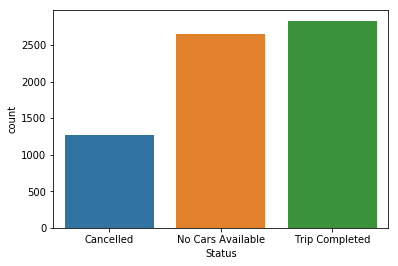

In [33]:
#Univariate analysis on Status column 
sns.countplot(rideReq["Status"],order=['Cancelled','No Cars Available','Trip Completed'])
plt.show()

- Above analysis we can easily see that `No cars available` status is more frequent than the number of trips `cancelled` status.<br/>
- Hence, If someone would have thought that, due to drivers may cancel the trip cause the unavailablity of the Cab is not entirely True. But the problem is because of `No cars available` in most of the cases.

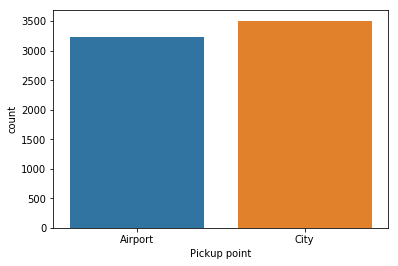

In [44]:
#Univariate analysis on Pickup Point column 
sns.countplot(rideReq["Pickup point"])
plt.show()

- Above analysis shows that there are 2 pickup points in the dataset.
- Count of both pickup points `Airport` and `City` are almost same.

---

## Bivariate Analysis

In [52]:
# Analyze Status and Pickup point.
rideReq1.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

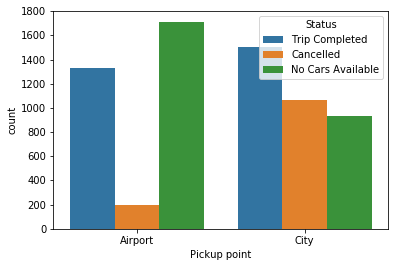

In [55]:
# Visualizing the count of Status and Pickup point.
sns.countplot(x=rideReq['Pickup point'],hue =rideReq['Status'] ,data = rideReq)
plt.show()

- Above plot says a lot about the reality, as we already know that the Airport is away from the city, that's why,<br/> 
- Pickup Point: **Airport**<br/>
    1) `No Cars Available` status count is very high.<br/>
    2) `Cancelled` status count is very low which is again obvious, Cabs in the Airport area are mostly waiting for the passangers from the Airport.<br/>
- Pickup Point: **City**<br/>
    1) `Cancelled` status count is high due to either Driver doesn't want to go to the Airport or Passanger cancels the trip. It's all about choice here.<br/>
    2) `No Cars Available` status count is also high enough to create supply demand Gap, hence this is the problem look into.

---

## Derived Metrics and Analysis

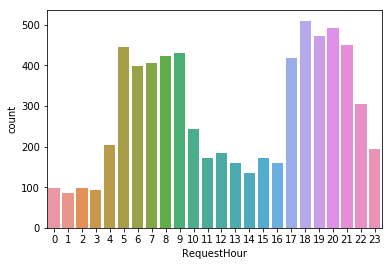

In [48]:
# Request Hour
rideReq2 = rideReq1.copy()

## At what hour requests are maximum?
rideReq2['RequestHour'] = rideReq2['Request timestamp'].apply(lambda x: x.hour)

sns.countplot(rideReq2['RequestHour'])
plt.show()

- Above analysis speaks a lot about why there is a problem of "No Cars Available"?
- As we can see in the above plot that most of the people requests for the car in the **Morning** or **Evening**.
- **Morning** and **Evening** are the time when there is rush.
- Let's divide the Request Hours into Time slots to understand better about at what Time slot problems arise... 

In [58]:
# Request Time Slot
rideReq2['RequestTimeSlot'] = rideReq2['RequestHour'].apply(lambda x: "Morning" if(x>=5 and x<=8) else\
                                                            ("Late Morning" if(x>=9 and x<=12) else \
                                                             ("Afternoon" if(x>=13 and x<=16) else \
                                                              ("Evening" if(x>=17 and x<=21) else \
                                                               ("Night" if((x>=22 and x<=23)or(x==0)) else \
                                                                "Early Morning")))))

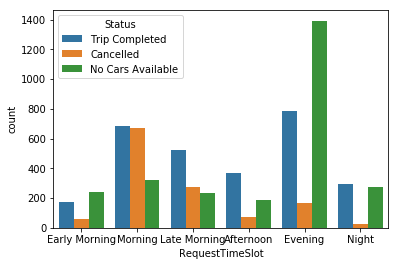

In [63]:
# Visualizing RequestTimeSlot along with the status
sns.countplot(x=rideReq2['RequestTimeSlot'],hue=rideReq2['Status'],order=["Early Morning","Morning",\
                                                                          "Late Morning","Afternoon",\
                                                                          "Evening","Night"])
plt.show()

- Above plot shows that more requests are appeared to be in the Evening slot followed by Morning slot.
- Both Evening and Morning slots have opposite trend, in Evening slot `No Cars Available` is high but in the Morning slot `Cancelled` is high. 
- Now, question may arise, why is this happening? or Is this status is somehow related to pickup point? Let's figure it out.

In [78]:
# Grouping of Pickup Point, Request Time Slot and Status count
CountByPickupPt = rideReq2.groupby(by=['Pickup point','RequestTimeSlot','Status']).size()
CountByPickupPt

Pickup point  RequestTimeSlot  Status           
Airport       Afternoon        Cancelled              40
                               No Cars Available      50
                               Trip Completed        162
              Early Morning    Cancelled               2
                               No Cars Available     118
                               Trip Completed         80
              Evening          Cancelled             106
                               No Cars Available    1321
                               Trip Completed        373
              Late Morning     Cancelled              32
                               No Cars Available      44
                               Trip Completed        239
              Morning          Cancelled              15
                               No Cars Available      14
                               Trip Completed        308
              Night            Cancelled               3
                               No Cars 

In [79]:
# Let's plot CountByPickupPt but before that we have to convert it into dataframe.
type(CountByPickupPt)

pandas.core.series.Series

In [84]:
# Series to DataFrame along with unstacking due to multiple index
Group_df = pd.DataFrame(CountByPickupPt.unstack(fill_value=0))

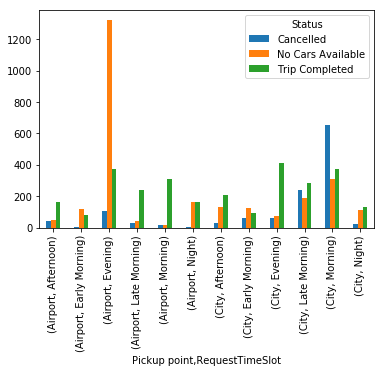

In [87]:
# Plot
Group_df.plot.bar()
plt.show()

Above plot shows that,<br/>
- `No Cars Available` status are in the `Evening` from `Airport` to `City`.
- `Cancelled` status are in the `Morning` from `City` to `Airport`.<br/>
Hence, now picture is more clear...

Now, let's show the Gap in the supply and Demand for all the Time slots that we have created along with the pickup points so that we can reach a proper conclusion and propose a better Hypothesis.

Let's create a Gap column with 2 value **Trip** and **No Trip**,basically, <br/>
- **Trip:** If `Trip Completed`
- **No Trip:** If Trip `Cancelled` or `No Cars Available`

In [88]:
# Gap
rideReq2['Gap'] = rideReq2['Status'].apply(lambda x: 'Trip' if(x=='Trip Completed') else 'No Trip')

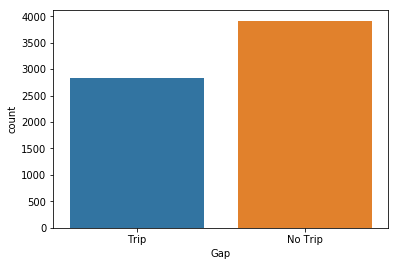

In [90]:
#Plot to Gap for complete Dataset
sns.countplot(x=rideReq2['Gap'])
plt.show()

- Above plot simply shows that there is definately gap between supply and Demand as a whole.
- We need to identify this gap for each pickup point along with time slot.

In [91]:
# Group Pickup point, Time slots & Gap
# Create a DataFrame out of it to plot
Group_df1 = pd.DataFrame(rideReq2.groupby(['Pickup point','RequestTimeSlot','Gap']).size().unstack(fill_value=0))

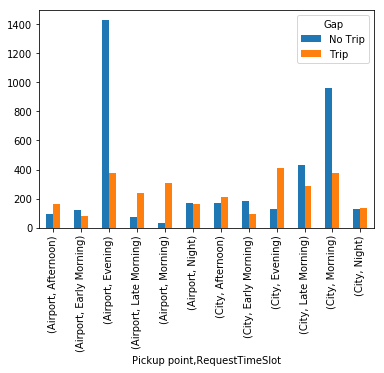

In [92]:
# Plot Gap for Pickup point and Time slots
Group_df1.plot.bar()
plt.show()

- Above plot says that in most of the cases there is negative gap between Supply and Demand.
- **Evening** Time slot from **Airport** to **City** and **Morning** Time slot from **City** to **Airport** are most problematic.

---

## Hypothesis of Problem

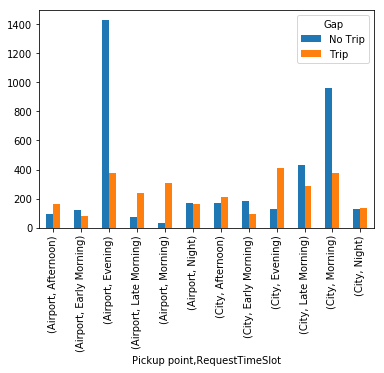

In [99]:
Group_df1.plot.bar()
plt.show()

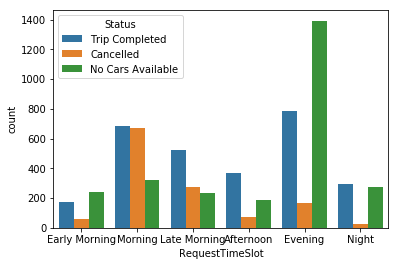

In [104]:
sns.countplot(x=rideReq2['RequestTimeSlot'],hue=rideReq2['Status'],order=["Early Morning","Morning",\
                                                                          "Late Morning","Afternoon",\
                                                                          "Evening","Night"])
plt.show()

**Pickup Point: City**<br/>

As per above plots, the morning time slot show the gratest negative gap and it is problematic due to requests are being cancelled. Reason behind request cancellation could be morning rush. It can be considered that most probably drives cancelled the reuest for Airport as they can get many rides within the city instead of single Ariport ride.

**Pickup Point: Airport**<br/>

As per above plots, the evening time slot show the gratest negative gap and it is problematic due to No Cars Available. Reason behind *No Cars Available* could be due to not enough cars are available as cars might not be in the airport area due they are in the city and some of the drivers might have gone to home.

---

## Recommendations

Based on the performed analysis of data, there are some recommendations which can be used by Uber to bridge the gap between supply and demand:
- For Airport to city, an Uber stand can be created at Airport where Cabs will available all the time, this will itself lower down the **No Cars Available** status.
- For City to Airport, Uber can give some small reward or something to the drives in the morning. This might attract drivers to go for Airport, this step can be helpful in reducing the number of cancellation during morning time for Airport.
- There is definately need of more cars for filling the Gap.